# Implementing BSRmerge

In [1]:
cd ~/Desktop/Repositories/Bioanalysis/bioreactor_results

C:\Users\agilman\Desktop\Repositories\Bioanalysis\bioreactor_results


In [2]:
%run ./BSRmerge.py
%run ./BSRplots.py

In [3]:
cd ~/Desktop/BSR6

C:\Users\agilman\Desktop\BSR6


In [4]:
D_df = vicell_convert_xlsx()
vicell_check_format(D_df)
D_df = vicell_clean(D_df)
df_vcl = vicell_merge_convert(D_df)

####   ViCell Import Report ####


Total number of .xlsx files in dir: 1
List of .xlsx files: ['BSR6.xlsx']


Converting excel files into DataFrames: 
BSR6.xlsx: CONVERTED


#### ViCell Format Report ####


Total files to verify: ['BSR6.xlsx']
BSR6.xlsx: CONFIRMED


#### ViCell Data Cleaning Report ####


BSR6.xlsx-------- Data Cleaning Complete
WARNING! Sample ID does not match File name for the following indeces: [0]
All samples are of type: CHO


#### ViCell Data Merge Report ####


Sample date range: 2019-12-06 - 2019-12-24
Unique sample ID's: ['BSR6 ' 'R0019' 'R0020' 'R0021' 'R0022']
Total number of samples: 71


In [5]:
D_flx = flex_convert_csv()
D_flx = flex_check_format(D_flx)
df_flx = flex_merge(D_flx)

####   FlEX Import Report ####


Total number of .csv files in dir: 1
List of .csv files: ['SampleResults2020-01-02_091530.csv']


Converting .csv files into DataFrames: 
SampleResults2020-01-02_091530.csv: CONVERTED


#### FLEX Format Report ####


Total files to verify: ['SampleResults2020-01-02_091530.csv']


SampleResults2020-01-02_091530.csv----------Converted Succesfully
Accpeted unique sample IDs: ['R19 BATCH' 'R20 BATCH' 'R21 BATCH' 'R22 BATCH' 'R0019' 'R0020' 'R0021'
 'R0022' 'R0022 glucresamp' 'R0019 Gluc' 'R0020 Gluc' 'R0021 Gluc'
 'R0022 Gluc' 'R0019 resamp']
Rejected unique sample IDs: ['C1-A' 'C1-B' 'C5-A' 'C1B' 'C5B']




#### FLEX Data Merge Report ####


Sample date range: 2019-12-06 - 2019-12-24
Unique sample ID's: ['R19 BATCH' 'R20 BATCH' 'R21 BATCH' 'R22 BATCH' 'R0019' 'R0020' 'R0021'
 'R0022' 'R0022 glucresamp' 'R0019 Gluc' 'R0020 Gluc' 'R0021 Gluc'
 'R0022 Gluc' 'R0019 resamp']
Total number of samples: 92


In [ ]:
#OPTIONAL creating a dictionary to change all in list into key
dict_change = {"R0015 Gluc":["r15 GLUC"],
              "R0016 Gluc":["r16 GLUC"]}
df_flx = rename_flex_sample_id(dict_change, df_flx)

In [6]:
merged = merge_vcl_flx(df_vcl, df_flx)
merged = calc_runtime(merged)

#### Merge Report ####


Unique sample IDs: ['BSR6 ' 'R0022' 'R0019' 'R0020' 'R0021' 'R19 B' 'R20 B' 'R21 B' 'R22 B']
Total number of rows: 96


In [ ]:
merged.drop([0], inplace = True)
merged

In [7]:
df = merged

In [8]:
df = calc_qp(df)

# Plotting 4-pane figures

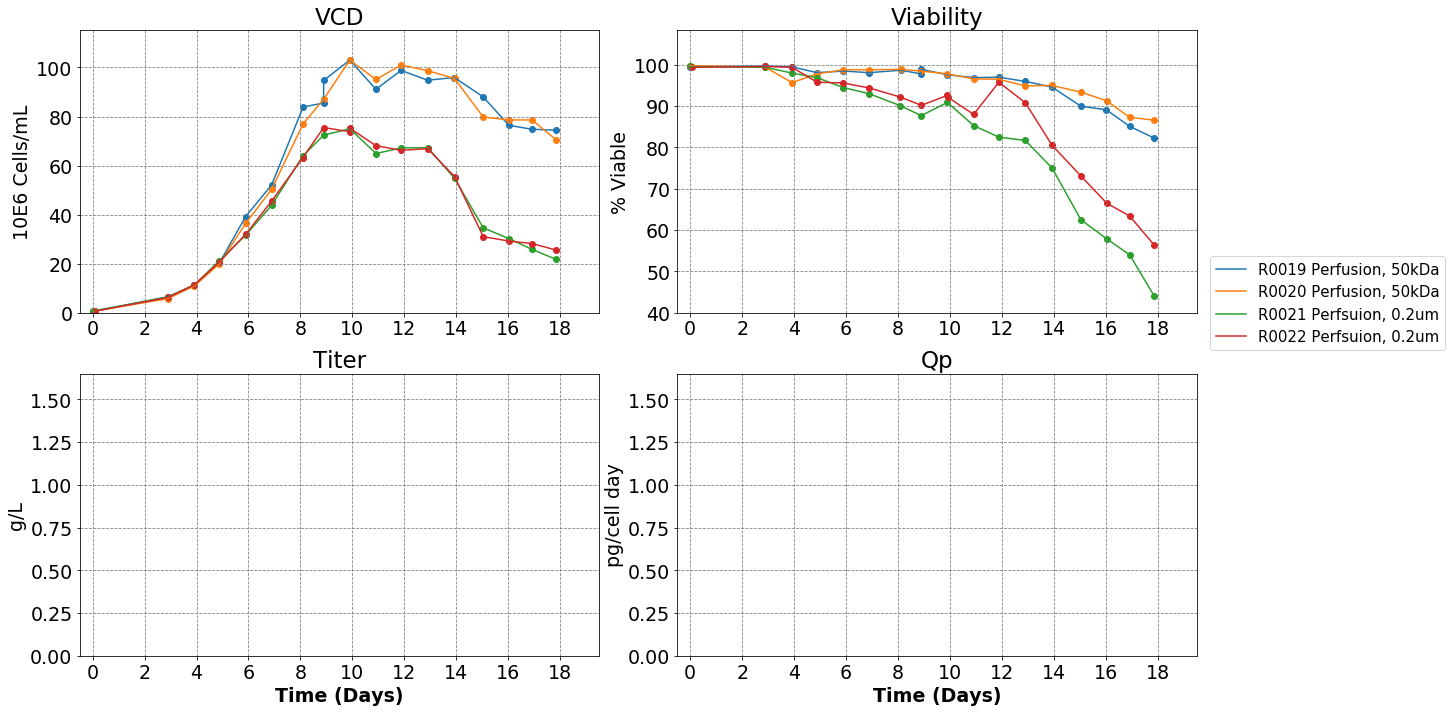

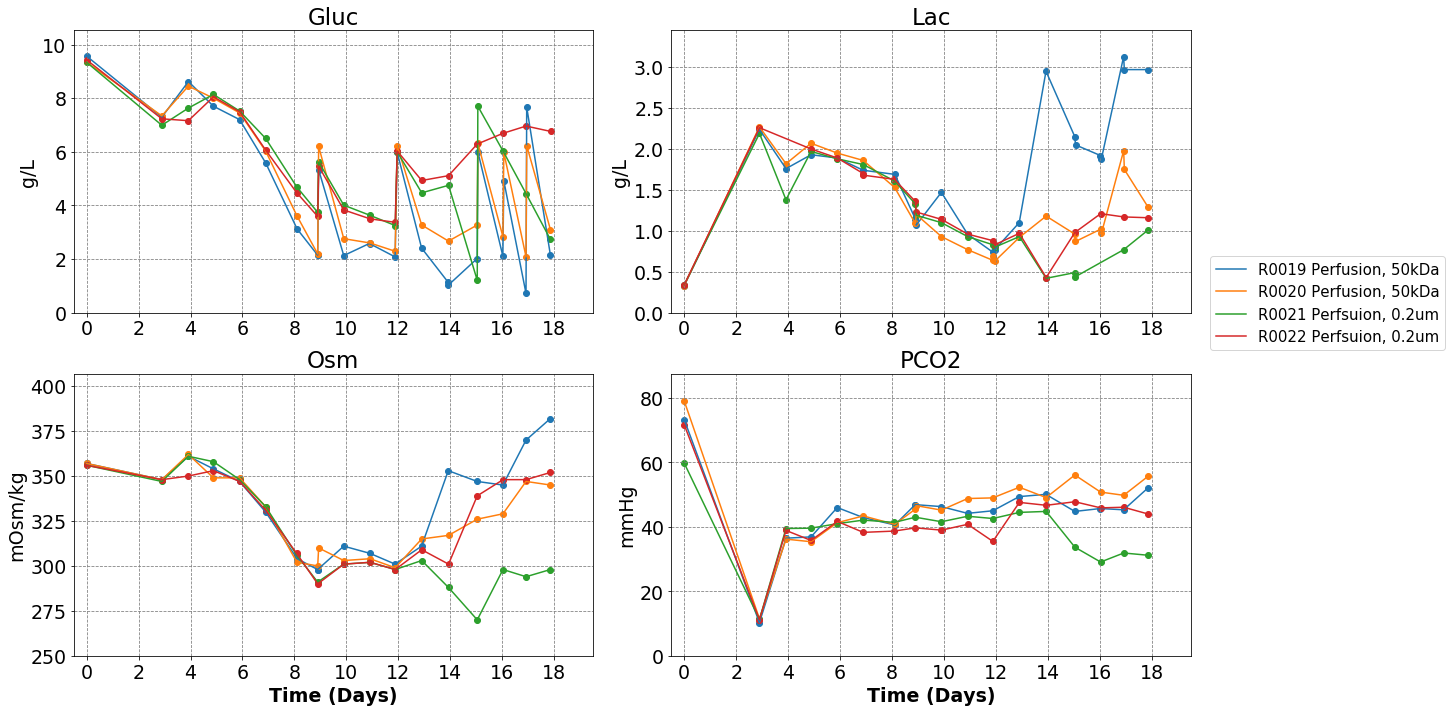

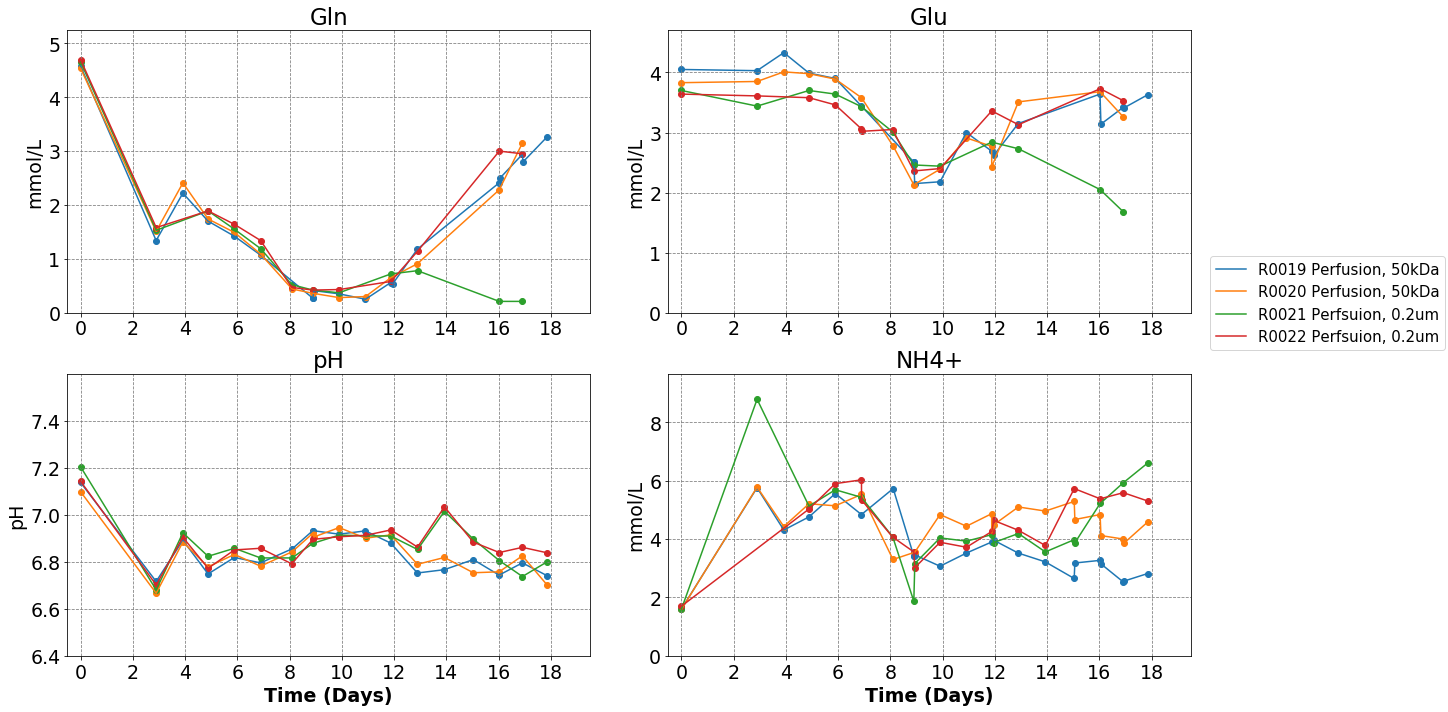

In [9]:
list_BSR = ["R0019","R0020","R0021","R0022"]
for i in list_4pane:
    plot_2by2(list_BSR, i, df, legend = lgnd, xmax = 19)

# Plotting 3 pane figures

In [ ]:
for i in list_3pane:
    plot_3by1(list_BSR, i, df, legend = lgnd, xmax = 14)

# Plotting single figures 

In [ ]:
list_BSR = ["R0019","R0020","R0021","R0022"]

clms_list = ['VCD', 'Viability', 'Titer', 'O2 Saturation', 'PCO2', 'Gluc', 'Lac', 'pH','NH4+','Gln', 'Glu',
        'Na+', 'K+', 'Ca++', "Osm", 'Qp']

for i in clms_list:
    plot_single(list_BSR, i, df)